# Complex ON Model

In [1]:
import numpy as np
import pandas as pd

from pystatplottools.pdf_env.loading_figure_mode import loading_figure_mode
fma, plt = loading_figure_mode(develop=True) # develop=False will export the generated figures as pngs into "./data/RectangleData"
plt.style.use('seaborn-dark-palette')

if 'root_dir' not in locals():
    # Navigate to examples/ComplexONModel directory as simulation root directory
    import os
    os.chdir("../examples/ComplexONModel")
    root_dir = os.getcwd()

# To be able to compute custom measures
import sys
sys.path.append("./../../python_scripts")
    
mcmc_model_dir = "ComplexONModelComplexLangevin/"
mcmc_data_dir = root_dir + "/data/" + mcmc_model_dir
mcmc_results_dir = root_dir + "/results/" + mcmc_model_dir

data_dir = root_dir + "/data/" + mcmc_model_dir
results_dir = root_dir + "/results/" + mcmc_model_dir

## MCMC Results

### Expectation Values

In [2]:
from mcmctools.modes.expectation_value import load_expectation_value_results
expectation_values = load_expectation_value_results(files_dir="ComplexONModelComplexLangevin")
# Insert KappaImag as column (as floating number)
expectation_values.insert(0, "KappaImag", expectation_values.index.values.astype(np.float))
expectation_values.insert(1, "SecondMoment", np.real(np.sum(np.power(expectation_values["ExpVal"].values, 2.0), axis=1)))
expectation_values = expectation_values.sort_values("KappaImag")
expectation_values

Quantity   KappaImag SecondMoment              ExpVal               Error  \
Observable                                     Energy              Energy   
Element                                                                     
kappa_imag                                                                  
-0.400000       -0.4    -8.499852 -2.651192+4.021026j  0.001648+0.001292j   
-0.300000       -0.3     0.718977 -2.931371+3.015228j  0.000994+0.000367j   
-0.200000       -0.2     7.472666 -3.168295+2.011400j  0.001412+0.000217j   
-0.100000       -0.1    11.019473 -3.312443+1.001911j  0.001200+0.000087j   
0.000000         0.0    12.024227 -3.359045+0.000000j  0.000905+0.000000j   
0.100000         0.1    10.399530 -3.271822-1.003942j  0.001106+0.000105j   
0.200000         0.2     7.480483 -3.177891-2.008619j  0.001115+0.000228j   
0.300000         0.3     0.961802 -2.951347-3.008498j  0.001358+0.000329j   
0.400000         0.4    -8.061403 -2.712014-3.990266j  0.001043+0.000395j   

Quantity                ExpVal                                          \
Observable                Mean                                           
Element                      0                   1                   2   
kappa_imag                                                               
-0.400000  -0.440875-0.152759j  0.086621-0.065548j  0.714513-0.573664j   
-0.300000   0.796554-0.067839j -0.795077+0.272565j -0.022362+0.059528j   
-0.200000   0.600802-0.105001j  0.586590-0.128550j  0.326495-0.053910j   
-0.100000  -0.662118+0.059170j  0.293428-0.041859j  0.629164-0.050899j   
0.000000   -0.052438+0.000000j  0.825012+0.000000j  0.129665+0.000000j   
0.100000   -0.078508+0.048926j  0.494332+0.050610j -0.598087-0.066681j   
0.200000   -0.345109+0.019465j -0.818844-0.120568j -0.604899-0.066724j   
0.300000    0.783878+0.132515j -0.417603-0.060747j -0.722991-0.035661j   
0.400000    0.535931+0.333338j -0.598670-0.171254j  0.066442-0.083495j   

Quantity                                     Error                      \
Observable                                    Mean                       
Element                      3                   0                   1   
kappa_imag                                                               
-0.400000   0.544831+0.112000j  0.001437+0.000588j  0.002994+0.001182j   
-0.300000   0.215468-0.116146j  0.001079+0.000367j  0.001192+0.000166j   
-0.200000   0.842427-0.102821j  0.000779+0.000089j  0.000961+0.000081j   
-0.100000  -0.374226+0.039051j  0.001309+0.000093j  0.002830+0.000075j   
0.000000    0.202084+0.000000j  0.001854+0.000000j  0.001410+0.000000j   
0.100000    0.325232+0.044706j  0.002395+0.000105j  0.002178+0.000059j   
0.200000   -0.546368-0.136454j  0.001206+0.000240j  0.001197+0.000121j   
0.300000   -0.353029-0.333565j  0.000825+0.000269j  0.002649+0.000482j   
0.400000    0.065007+0.032460j  0.001121+0.000284j  0.002097+0.000516j   

Quantity                                            
Observable                                          
Element                      2                   3  
kappa_imag                                          
-0.400000   0.001840+0.001167j  0.001468+0.000849j  
-0.300000   0.000857+0.000270j  0.001523+0.000175j  
-0.200000   0.002053+0.000155j  0.000658+0.000166j  
-0.100000   0.000982+0.000131j  0.001658+0.000063j  
0.000000    0.000984+0.000000j  0.002970+0.000000j  
0.100000    0.001372+0.000162j  0.001304+0.000105j  
0.200000    0.000955+0.000121j  0.001207+0.000193j  
0.300000    0.000965+0.000371j  0.001360+0.000716j  
0.400000    0.002147+0.000306j  0.001548+0.000448j

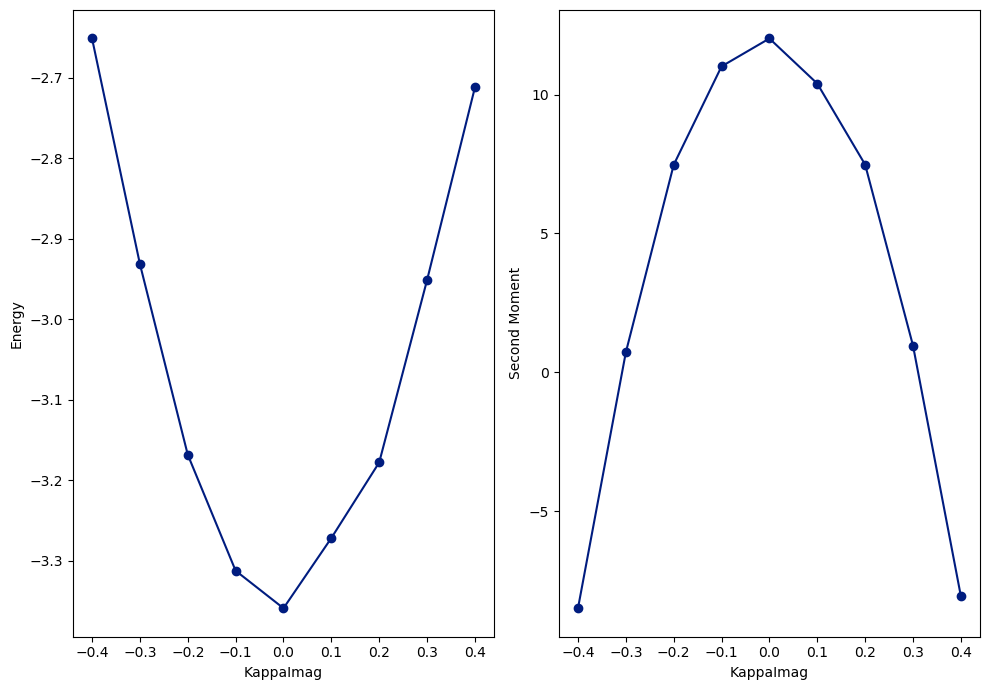

In [3]:
fig, axes = fma.newfig(1.4, ncols=2, figsize=(10, 7))

axes[0].plot(expectation_values["KappaImag"], np.real(expectation_values["ExpVal", "Energy", ""]), "o-")
axes[0].set_xlabel("KappaImag")
axes[0].set_ylabel("Energy")

axes[1].plot(expectation_values["KappaImag"], np.real(expectation_values["SecondMoment", "", ""]), "o-")
axes[1].set_xlabel("KappaImag")
axes[1].set_ylabel("Second Moment")

plt.tight_layout()

fma.savefig(results_dir, "average_plaquette")

## Configurations as Pytorch Dataset

We show how the mcmc configurations can be stored and loaded as a .pt file.

(See also python_scripts/loading_configurations.py and python_scripts/pytorch_data_generation.py)

### Preparation

In [4]:
data_generator_args = {
    # ConfigDataGenerator Args
    "data_type": "target_param",
    # Args for ConfigurationLoader
    "path": mcmc_data_dir,
    "total_number_of_data_per_file": 500,
    "identifier": "expectation_value",
    "running_parameter": "kappa_imag"
    # "chunksize": 100  # If no chunksize is given, all data is loaded at once
}

# Prepare in memory dataset
from pystatplottools.pytorch_data_generation.data_generation.datagenerationroutines import prepare_in_memory_dataset
from mcmctools.pytorch.data_generation.datagenerationroutines import data_generator_factory

prepare_in_memory_dataset(
    root=data_dir,
    batch_size=89,
    data_generator_args=data_generator_args,
    data_generator_name="BatchConfigDataGenerator",
    data_generator_factory=data_generator_factory
)

Random seed is set by np.random.seed()
Write new data_config into file - Data will be generated based on the new data_config file


### Generating and Loading the Dataset

In [5]:
# Load in memory dataset
from pystatplottools.pytorch_data_generation.data_generation.datagenerationroutines import load_in_memory_dataset

# The dataset is generated and stored as a .pt file in the data_dir/data directory the first time this function is called. Otherwise the .pt is loaded.
data_loader = load_in_memory_dataset(
    root=data_dir, batch_size=16, data_generator_factory=data_generator_factory, slices=None, shuffle=True,
    num_workers=0, rebuild=False
    # sample_data_generator_name="ConfigDataGenerator"  # optional: for a generation of new samples
)

# Load training data
for batch_idx, batch in enumerate(data_loader):
    data, target = batch
    # print(batch_idx, len(data))

Processing...
Random seed is set by np.random.seed()
Done!


### Inspection of the Dataset - Sample Visualization

In [6]:
from pystatplottools.visualization import sample_visualization

# Random samples
config, label = data_loader.dataset.get_random_sample()
batch, batch_label = data_loader.dataset.get_random_batch(108)

In [7]:
data[:, 1::2].min(), data[:, 1::2].max(), data[:, 0::2].min(), data[:, 0::2].max()

(tensor(-0.3730), tensor(0.3817), tensor(-1.7119), tensor(1.5874))

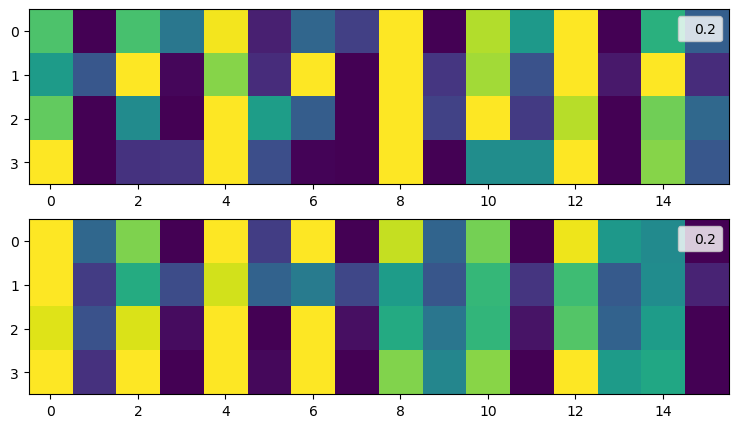

In [8]:
# Single Sample
fig, axes = fma.newfig(1, nrows=2, ratio=0.5, figsize=(10, 5))

# Real parts
sample_visualization.fd_im_single_sample(sample=config[0::2], label=label, config_dim=(4, 16), num_std=1,
                                         fig=fig, ax=axes[0]);
# Imag parts
sample_visualization.fd_im_single_sample(sample=config[1::2], label=label, config_dim=(4, 16), num_std=1,
                                         fig=fig, ax=axes[1]);
fma.savefig(results_dir, "single_sample")

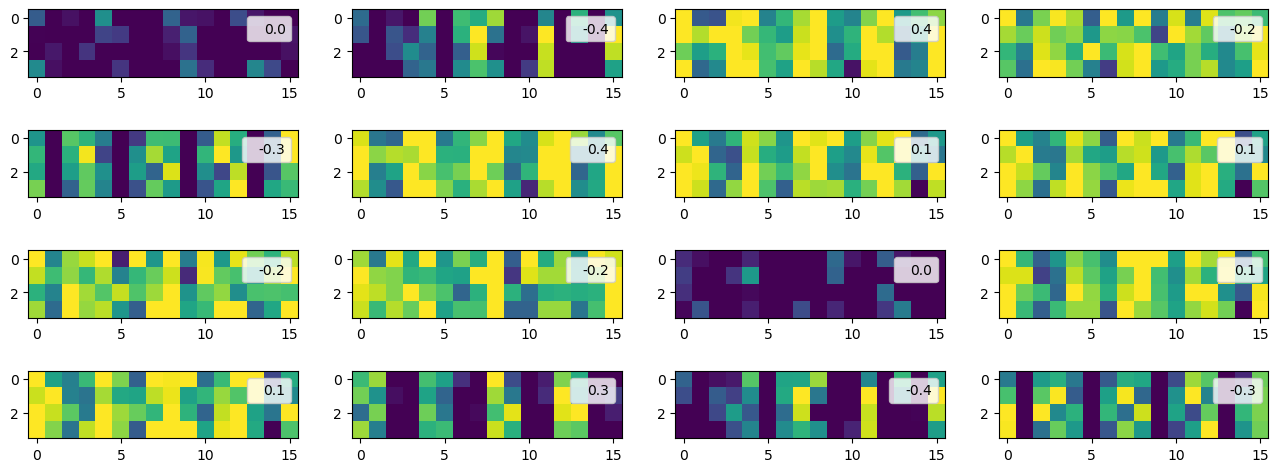

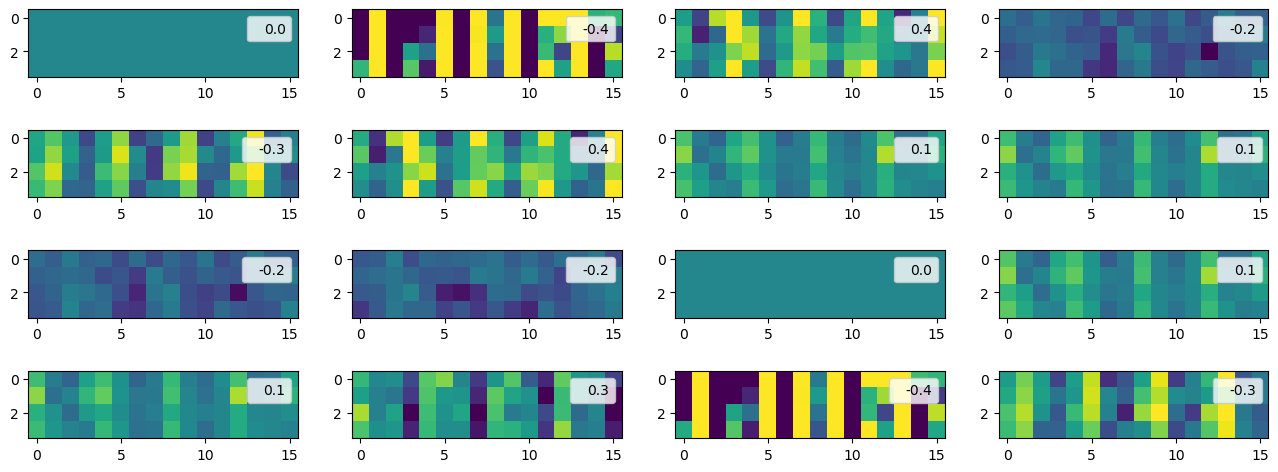

In [9]:
# Batch with labels
sample_visualization.fd_im_batch(batch[:, 0::2], batch_labels=batch_label, num_samples=16, dim=(4, 4),
                                 config_dim=(4, 16), num_std=1,
                                 fma=fma, filename="batch_real_parts", directory=results_dir, width=2.3, ratio=1.0, figsize=(16, 6));

sample_visualization.fd_im_batch(batch[:, 1::2], batch_labels=batch_label, num_samples=16, dim=(4, 4),
                                 config_dim=(4, 16), num_std=1,
                                 fma=fma, filename="batch_imag_parts", directory=results_dir, width=2.3, ratio=1.0, figsize=(16, 6));

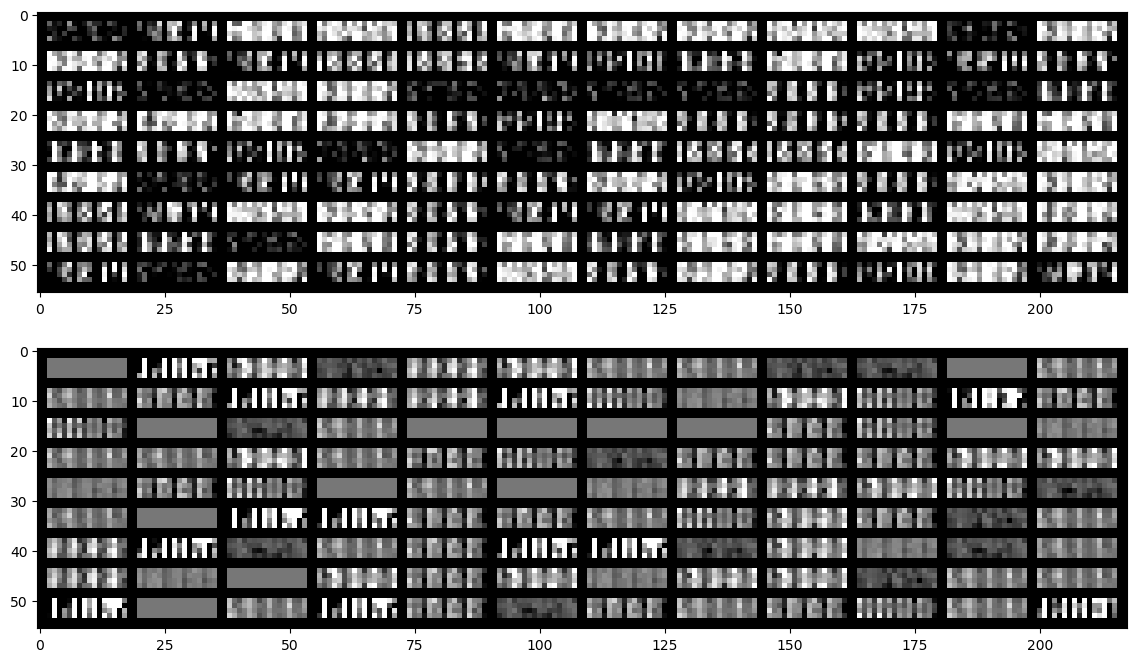

In [10]:
# Batch grid
fig, axes = fma.newfig(1, nrows=2, ratio=0.5, figsize=(16, 8))

# Real parts
sample_visualization.fd_im_batch_grid(batch[:, 0::2], config_dim=(4, 16), num_std=1,
                                      fig=fig, ax=axes[0]);
# Imag parts
sample_visualization.fd_im_batch_grid(batch[:, 1::2], config_dim=(4, 16), num_std=1,
                                      fig=fig, ax=axes[1]);
fma.savefig(results_dir, "batch_grid")